# imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# load data

In [ ]:
data_raw = pd.read_csv('data/clients.csv')

Dados coletados do dataset "comunidadeds" atrávez do software "Dbeaver" onde 3 dataframes com informaçõe sforam unidos com base no id de cada usuário

In [ ]:
data_raw.head()

,id,gender,age,region_code,policy_sales_channel,id.1,previously_insured,annual_premium,vintage,response,id.2,driving_license,vehicle_age,vehicle_damage
0,1,Male,44,28.0,26.0,1,0,40454.0,217,1,1,1,> 2 Years,Yes
1,2,Male,76,3.0,26.0,2,0,33536.0,183,0,2,1,1-2 Year,No
2,3,Male,47,28.0,26.0,3,0,38294.0,27,1,3,1,> 2 Years,Yes
3,4,Male,21,11.0,152.0,4,1,28619.0,203,0,4,1,< 1 Year,No
4,5,Female,29,41.0,152.0,5,1,27496.0,39,0,5,1,< 1 Year,No


**drop id's columns left by the datasets merge**

In [ ]:
data_raw = data_raw.drop(columns=['id.1','id.2'])

In [ ]:
data_raw.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'previously_insured', 'annual_premium', 'vintage', 'response',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

In [ ]:
data_raw = data_raw[['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'previously_insured', 'annual_premium', 'vintage',
       'driving_license', 'vehicle_age', 'vehicle_damage','response']]

**Datasets dimensions**

In [ ]:
data_raw.shape

(381109, 12)

# Checking data types

In [ ]:
data_raw.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
response                  int64
dtype: object

# Checking NA values

In [ ]:
data_raw.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
driving_license         0
vehicle_age             0
vehicle_damage          0
response                0
dtype: int64

# Descriptive Statistical

'id': numerical statistics

'gender': categorical statistics

'age': numerical statistics

'region_code': agroup e and count ids by region 

'policy_sales_channel': categorical statistics

'previously_insured': categorical statistics

'annual_premium': numerical statistics

'vintage': numerical statistics

'response': categorical statistics

'driving_license': categorical statistics

'vehicle_age': numerical statistics


 'vehicle_damage': categorical statistics

In [ ]:
df1 = data_raw.copy()

In [ ]:
num_atributtes = df1[['id','age','annual_premium', 'vintage']]
cat_atributtes = df1[['gender','policy_sales_channel','region_code','previously_insured','driving_license','vehicle_damage','vehicle_age','response']]

## Numerical statistics

In [ ]:
num_statistics = num_atributtes.agg(['max','min','mean','median','std','skew','kurtosis']).T
num_statistics['range'] = num_statistics['max'] - num_statistics['min']
num_statistics = num_statistics[['max','min','range','mean','median','std','skew','kurtosis']]
num_statistics

,max,min,range,mean,median,std,skew,kurtosis
id,381109.0,1.0,381108.0,190555.000000,190555.0,110016.836208,9.443274e-16,-1.200000
age,85.0,20.0,65.0,38.822584,36.0,15.511611,6.725390e-01,-0.565655
annual_premium,540165.0,2630.0,537535.0,30564.389581,31669.0,17213.155057,1.766087e+00,34.004569
vintage,299.0,10.0,289.0,154.347397,154.0,83.671304,3.029517e-03,-1.200688


<AxesSubplot:>

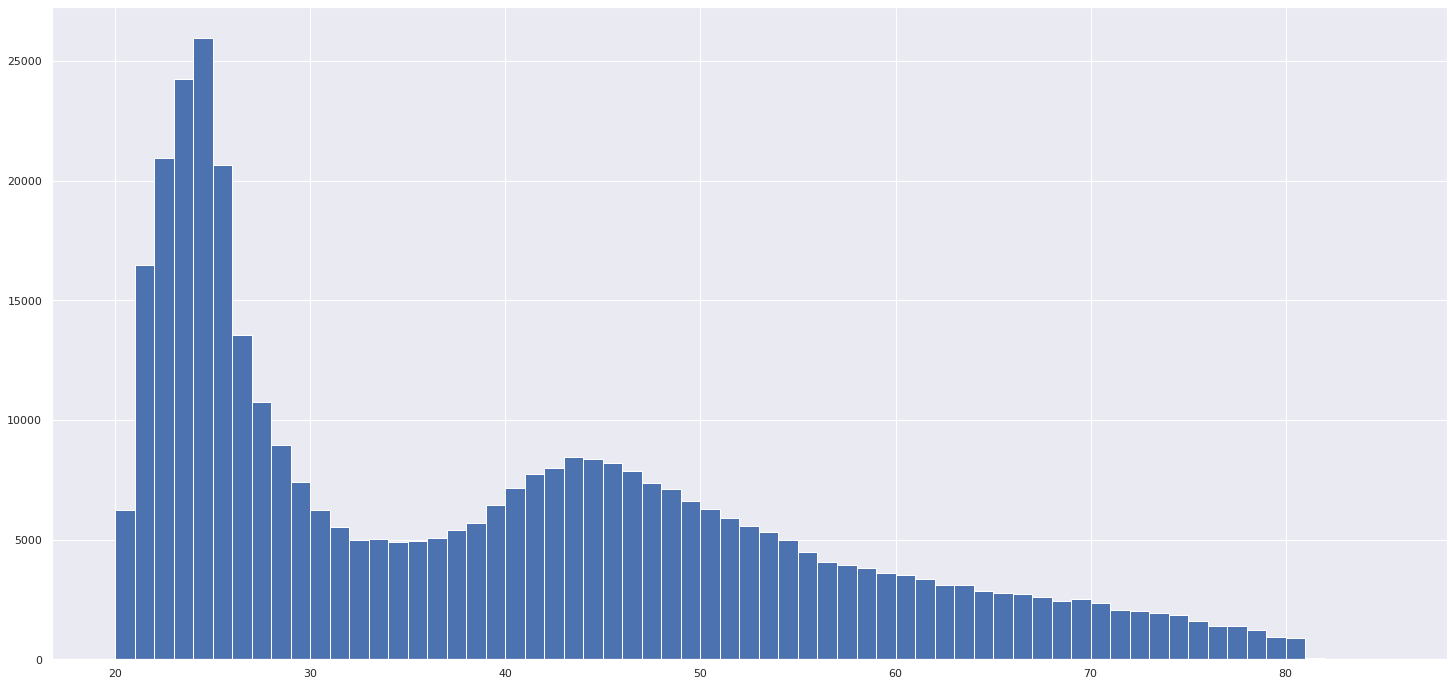

In [ ]:
num_atributtes['age'].hist(bins=65)

<AxesSubplot:>

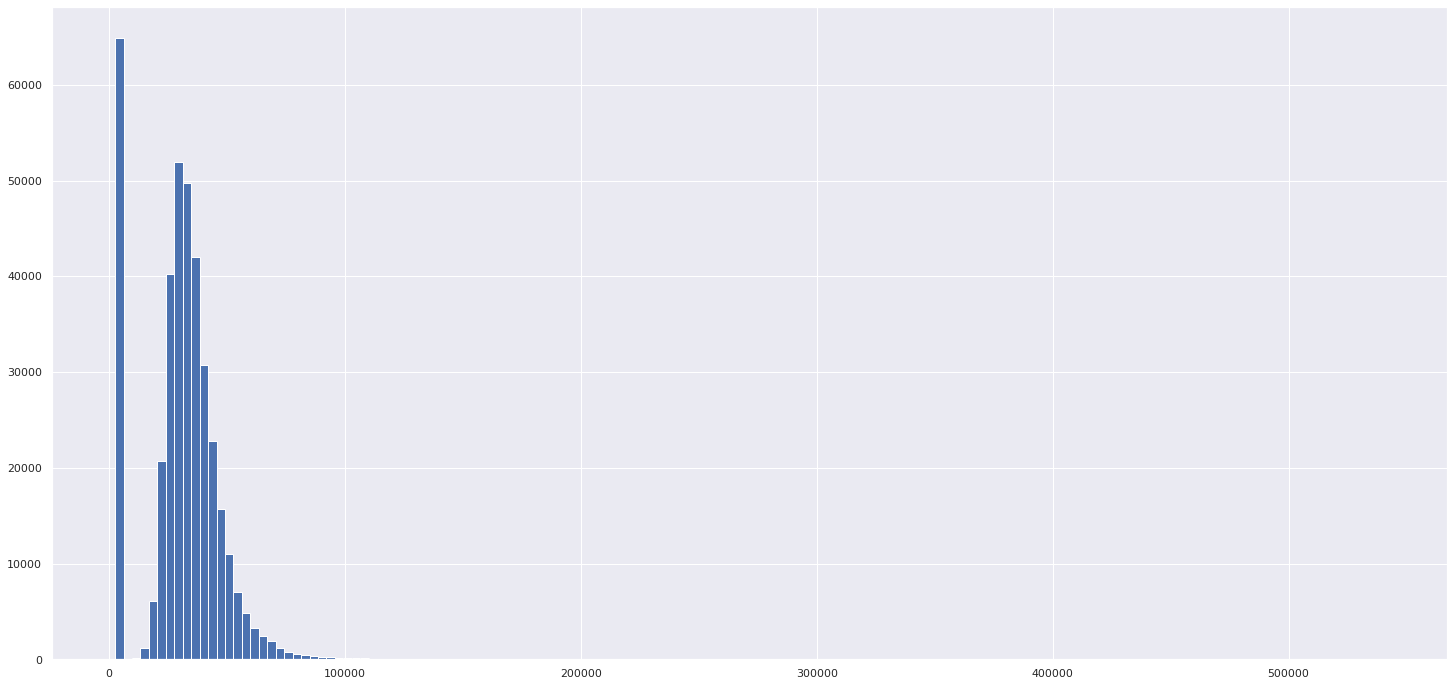

In [ ]:
num_atributtes['annual_premium'].hist(bins=150)

<AxesSubplot:>

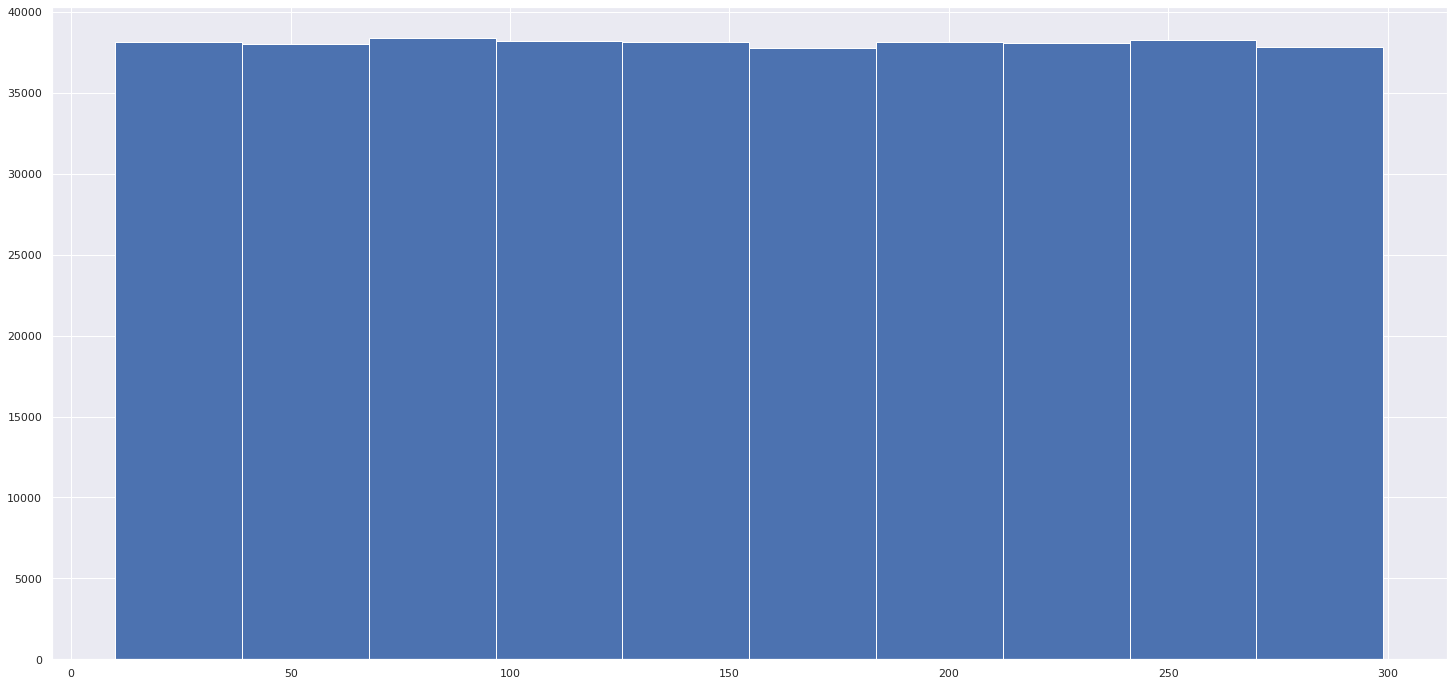

In [ ]:
num_atributtes['vintage'].hist()

# Categorical statistics

In [ ]:
cat_atributtes.head()

,gender,policy_sales_channel,region_code,previously_insured,driving_license,vehicle_damage,vehicle_age,response
0,Male,26.0,28.0,0,1,Yes,> 2 Years,1
1,Male,26.0,3.0,0,1,No,1-2 Year,0
2,Male,26.0,28.0,0,1,Yes,> 2 Years,1
3,Male,152.0,11.0,1,1,No,< 1 Year,0
4,Female,152.0,41.0,1,1,No,< 1 Year,0


In [ ]:
cat_atributtes.apply(lambda x: x.unique().shape[0])

gender                    2
policy_sales_channel    155
region_code              53
previously_insured        2
driving_license           2
vehicle_damage            2
vehicle_age               3
response                  2
dtype: int64

In [ ]:
resp = cat_atributtes[['response']].value_counts().reset_index()
resp["%"] =round( resp[0]/resp[0].sum()*100,2)
resp.columns=['response','count','%']
resp

,response,count,%
0,0,334399,87.74
1,1,46710,12.26


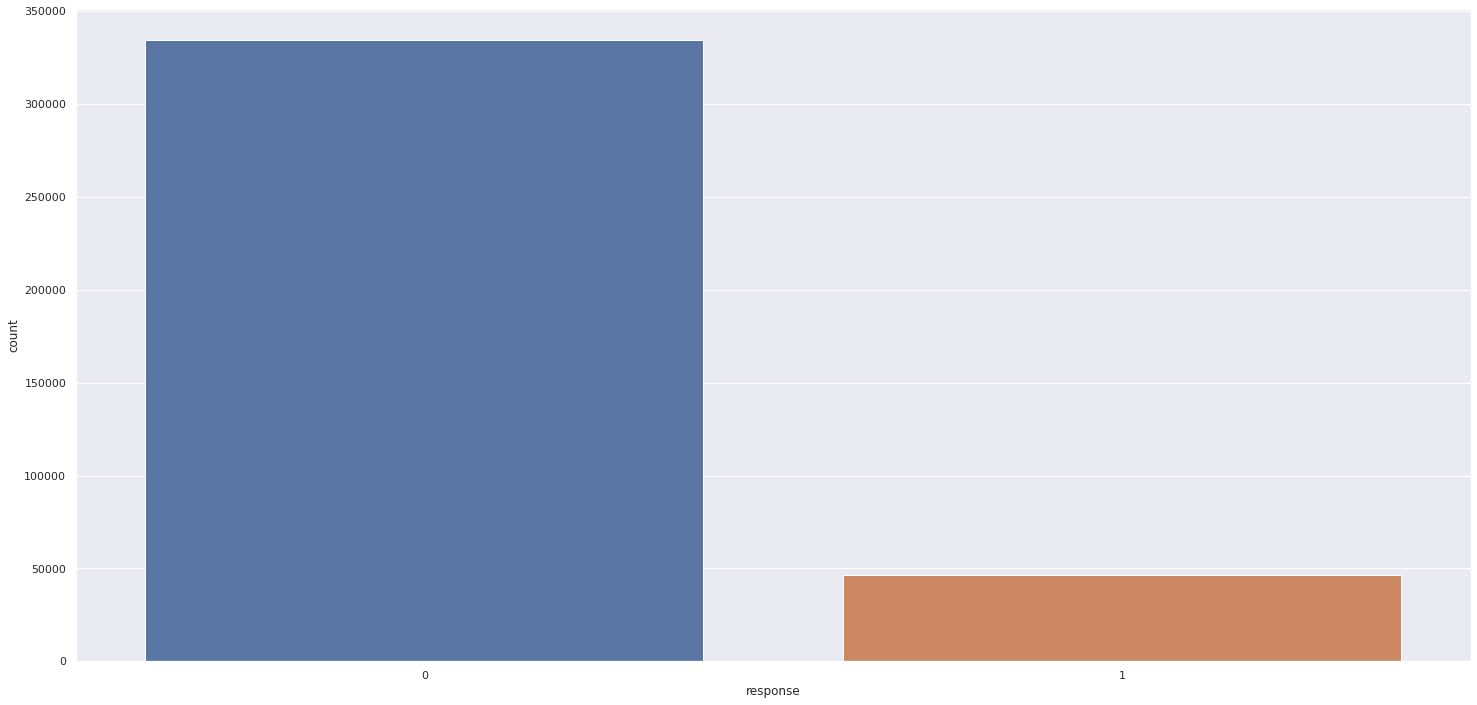

In [ ]:
sns.barplot(x='response',y='count',data=resp);

Variável resposta está desbalanceada

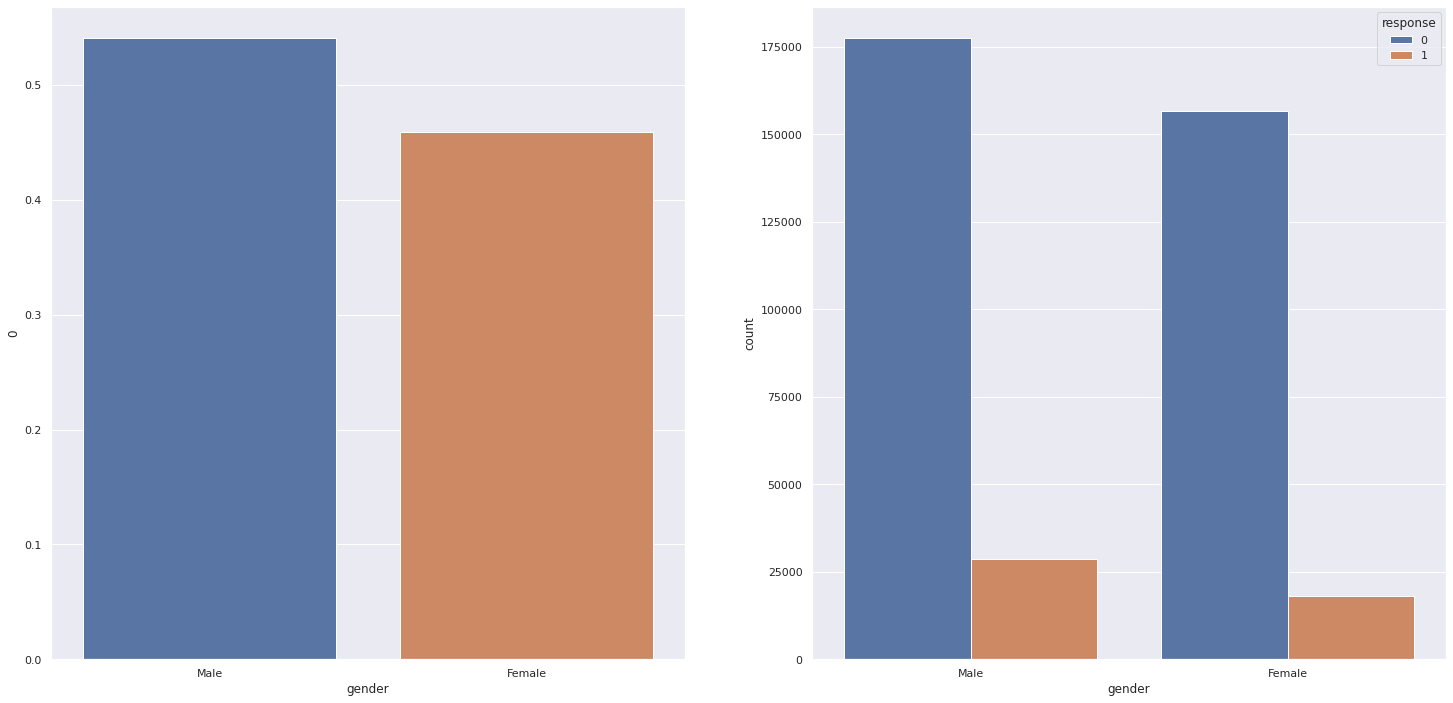

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='gender',y=0,data=cat_atributtes[['gender']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='gender',hue='response',data=cat_atributtes);

In [ ]:
rep_gen = cat_atributtes[['response','gender']].value_counts().reset_index()
rep_gen['_%'] = (round(rep_gen[0]/rep_gen[0].sum()*100,2))
rep_gen

,response,gender,0,_%
0,0,Male,177564,46.59
1,0,Female,156835,41.15
2,1,Male,28525,7.48
3,1,Female,18185,4.77


A variável genêro apresenta um pequeno deslanço tendo em sua maioria pessoas do sexo masculino, mas apresenta proporção parecida em relação a variável resposta

<AxesSubplot:>

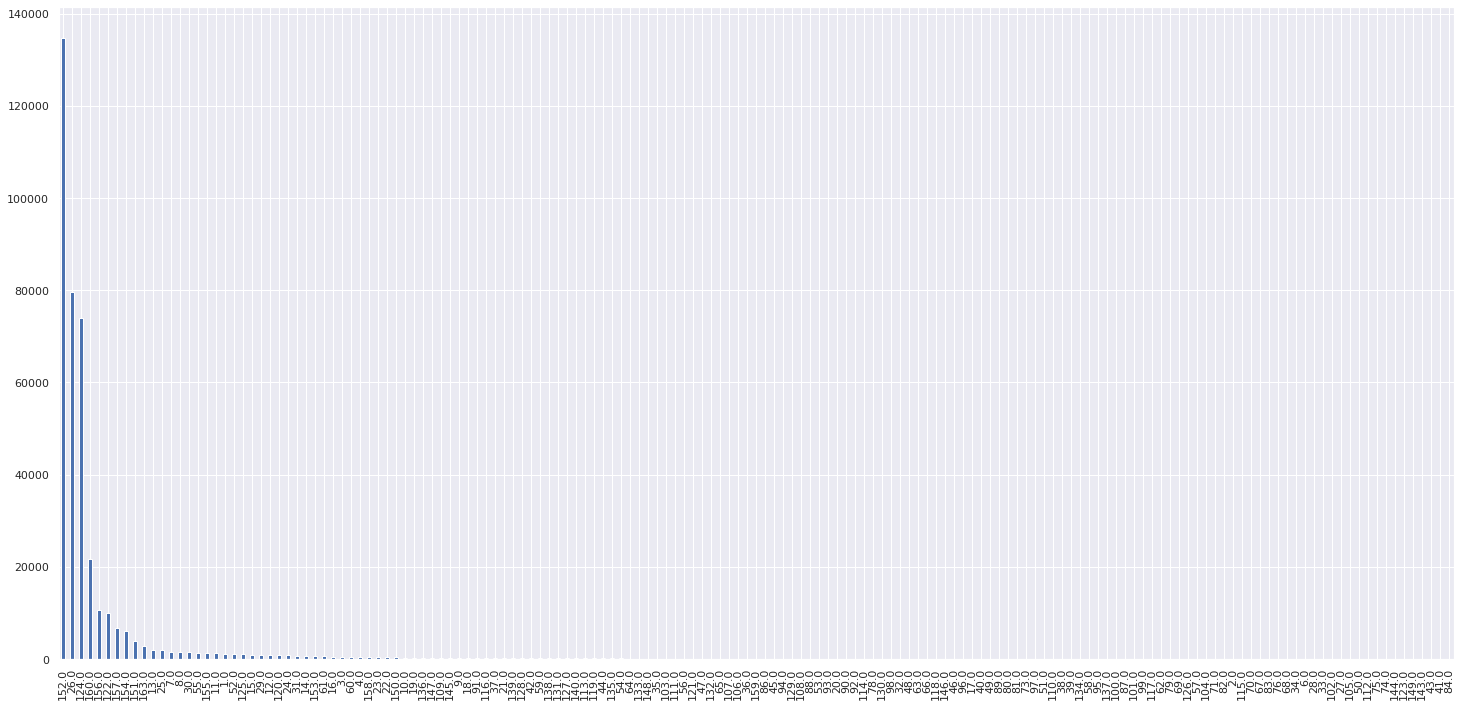

In [ ]:
cat_atributtes['policy_sales_channel'].value_counts().plot(kind='bar')

In [ ]:
cat_atributtes['policy_sales_channel'].value_counts().reset_index()[0:10]

,index,policy_sales_channel
0,152.0,134784
1,26.0,79700
2,124.0,73995
3,160.0,21779
4,156.0,10661
5,122.0,9930
6,157.0,6684
7,154.0,5993
8,151.0,3885
9,163.0,2893


In [ ]:
cat_atributtes['policy_sales_channel'].value_counts().reset_index()[0:10].sum()/len(cat_atributtes['policy_sales_channel'])

index                   0.003582
policy_sales_channel    0.919170
dtype: float64

Dos 155 meio de contato com o clientes 10 deles contém cerca de 92 % das interrasões, infelimente não temos o conhecimento sobre oq seria esses meios de contato

<AxesSubplot:>

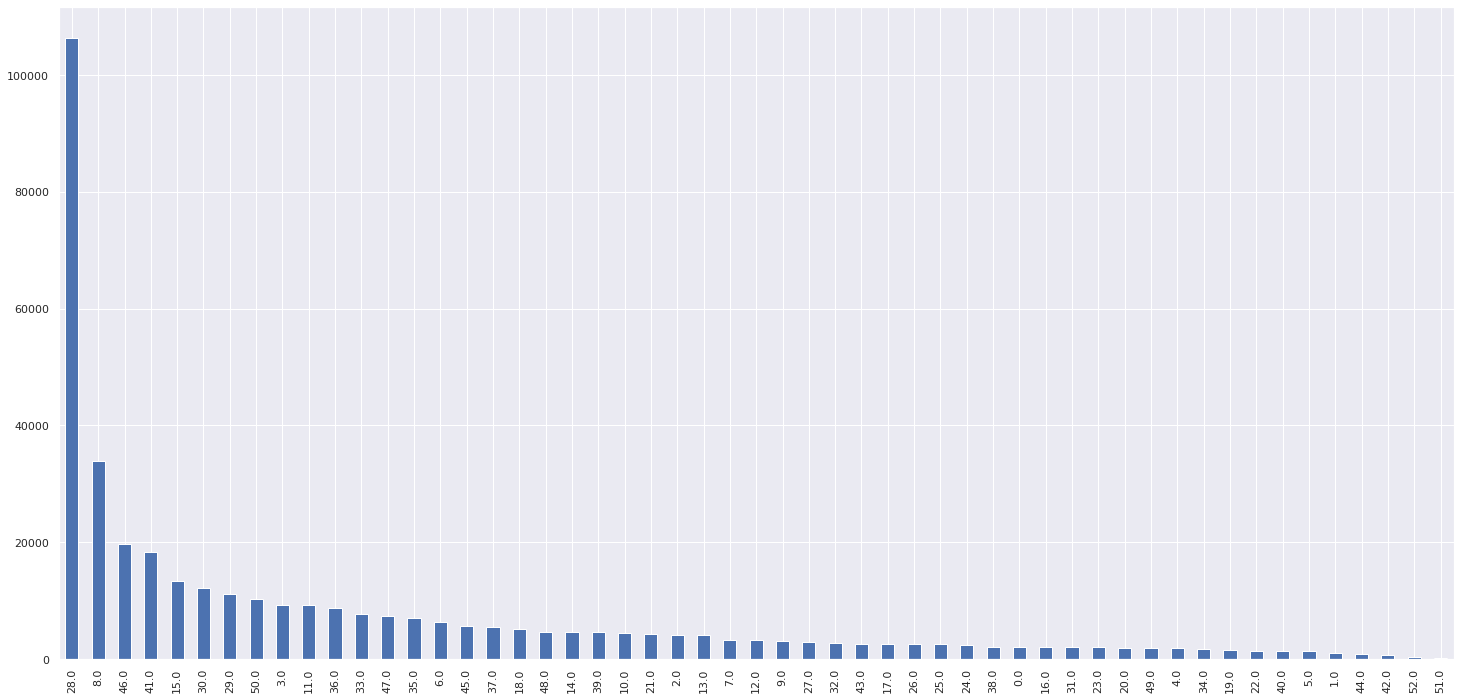

In [ ]:
cat_atributtes['region_code'].value_counts().plot(kind='bar')

Boa parte dos clientes se encontram concentraods em algumas regiões

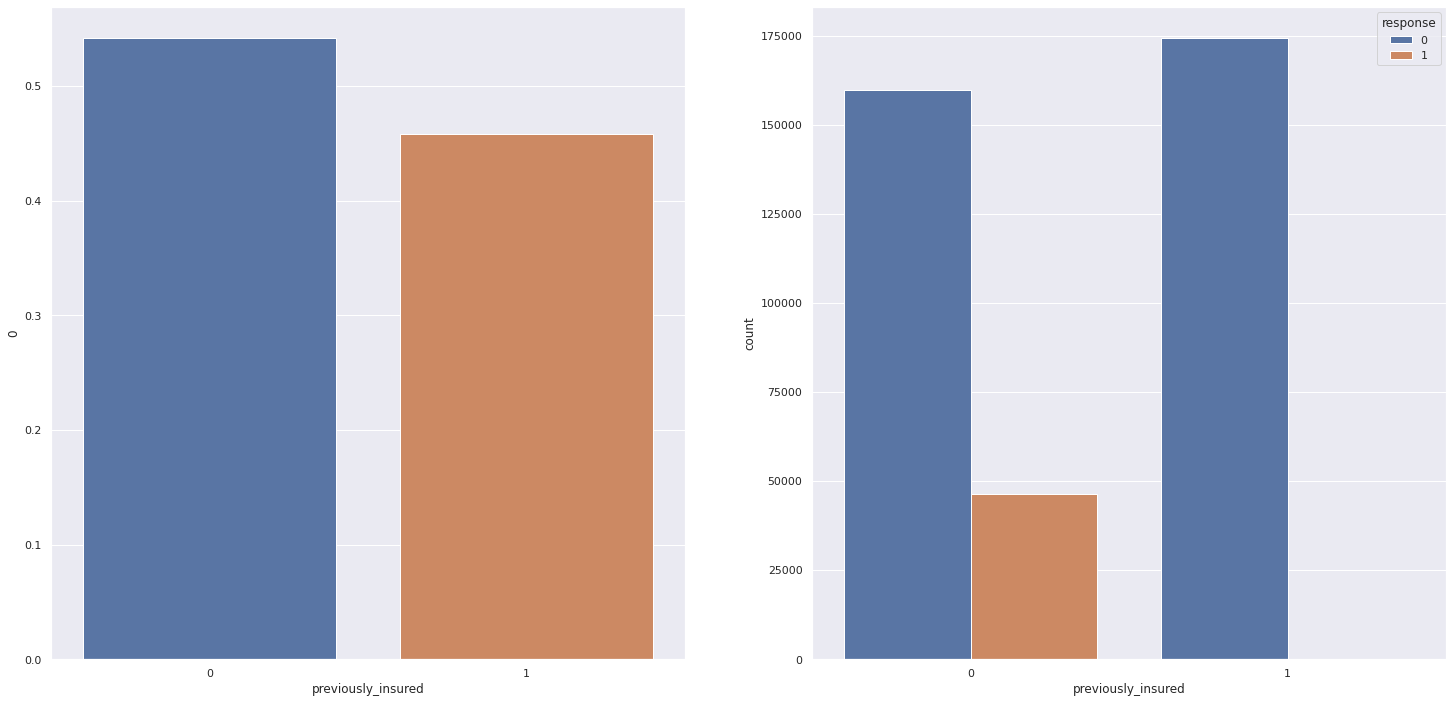

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='previously_insured',y=0,data=cat_atributtes[['previously_insured']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='previously_insured',hue='response',data=cat_atributtes);

Uma boa quantidade de clientes já possui seguro de carro

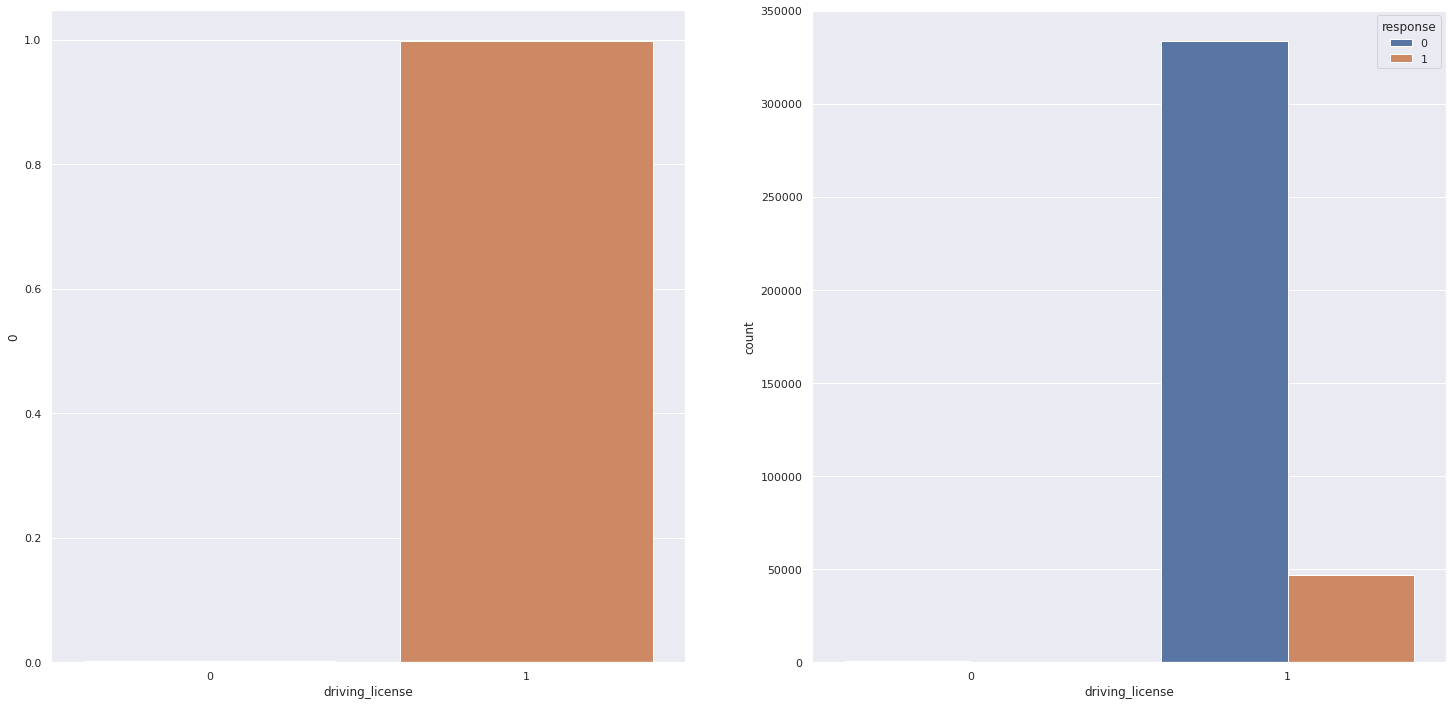

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='driving_license',y=0,data=cat_atributtes[['driving_license']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='driving_license',hue='response',data=cat_atributtes);

In [ ]:
cat_atributtes['driving_license'].value_counts()

1    380297
0       812
Name: driving_license, dtype: int64

Apenas uma pequena quantidade de clientes não possui carro, oq mostra que a pesquisa teve o foco certo

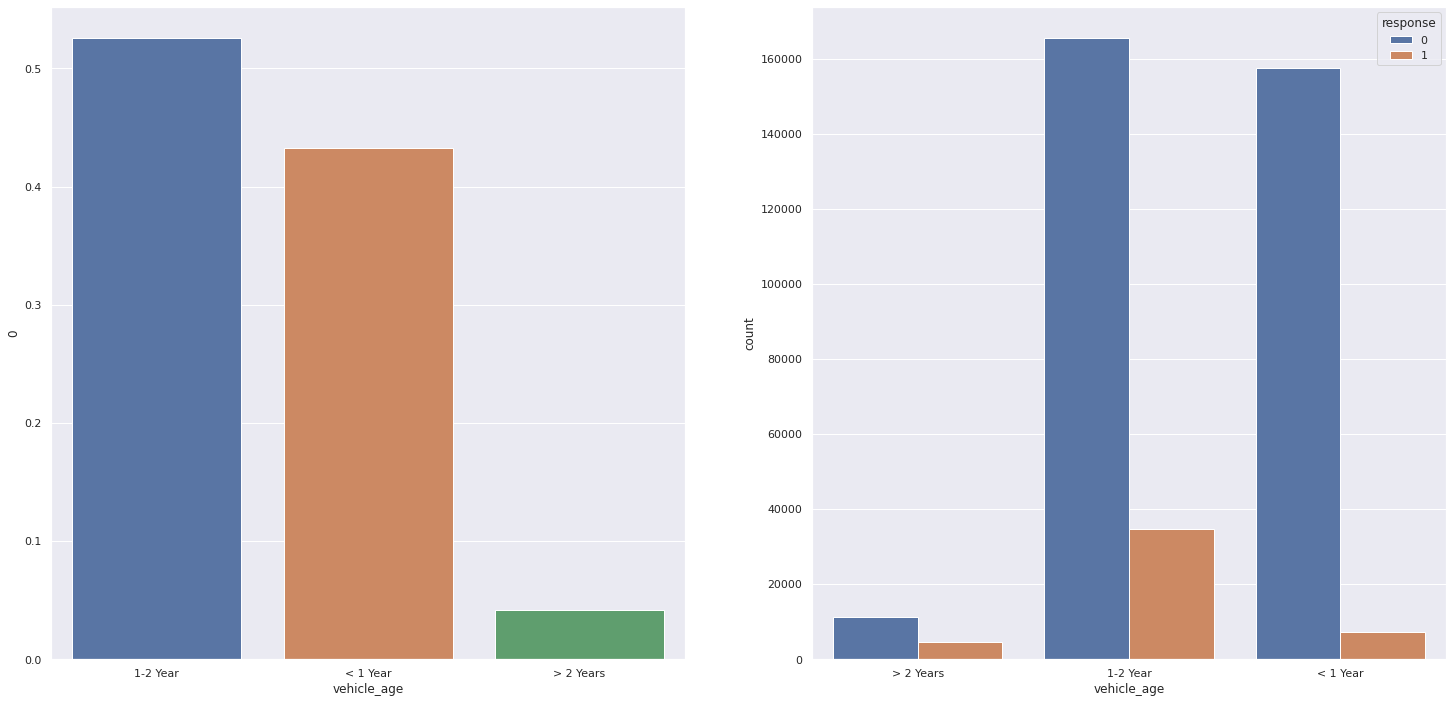

In [ ]:
plt.subplot(1,2,1)
sns.barplot(x='vehicle_age',y=0,data=cat_atributtes[['vehicle_age']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='vehicle_age',hue='response',data=cat_atributtes);

In [ ]:
veh = cat_atributtes['vehicle_age'].value_counts(normalize=True).reset_index()
veh.columns = ['vehicle_age','vehicle_age_%']
veh

,vehicle_age,vehicle_age_%
0,1-2 Year,0.525613
1,< 1 Year,0.432385
2,> 2 Years,0.042001


95.8% dos veiculos na pesquisa são tem até 2 anos de idade 

In [ ]:
#df1.to_csv('data/df1.csv',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3161d838-98a4-47ed-ae81-127ad2068af4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>